In [14]:
import numpy as np 
import pandas as pd 
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#modelling
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier ,XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [15]:
filepath = "../data/data.csv"
df = pd.read_csv(filepath)

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


In [21]:
X = df.drop(columns=['math_score'],axis=1)
Y = df['math_score']
print(X.head())
print(Y.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  reading_score  writing_score  average_score  \
0                    none             72             74      72.666667   
1               completed             90             88      82.333333   
2                    none             95             93      92.666667   
3                    none             57             44      49.333333   
4                    none             78             75      76.333333   

   total_score  
0          218  
1          247  
2          278  
3          148  
4          229  
0    72
1    69
2    90
3    47


In [25]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer ,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
        ]
) 

In [26]:
X_train ,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(800, 9) (200, 9) (800,) (200,)


In [28]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_square(true,predicted)
    return mae,mse,rmse,r2_square

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)  # Mean Absolute Error
    mse = mean_squared_error(true, predicted)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2_square = r2_score(true, predicted)  # R² Score
    return mae, rmse, r2_square


In [51]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SupportVectorRegressor": SVR(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}
model_list = []
r2_list = []
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)



In [53]:
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)
    
    # Predict on train and test data
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)
    
    # Append results to lists
    model_list.append(model_name)
    r2_list.append(model_test_r2)
    
    # Print evaluation results
    print(f"Model: {model_name}")
    print("Train Metrics:")
    print(f"  MAE: {model_train_mae}")
    print(f"  RMSE: {model_train_rmse}")
    print(f"  R2: {model_train_r2}")
    print("------------------------------------")
    print("Test Metrics:")
    print(f"  MAE: {model_test_mae}")
    print(f"  RMSE: {model_test_rmse}")
    print(f"  R2: {model_test_r2}")
    print("\n")


Model: LinearRegression
Train Metrics:
  MAE: 1.7035262089848402e-14
  RMSE: 2.1825346939021514e-14
  R2: 1.0
------------------------------------
Test Metrics:
  MAE: 1.6289192217300297e-14
  RMSE: 2.1199016026370327e-14
  R2: 1.0


Model: DecisionTreeRegressor
Train Metrics:
  MAE: 0.0
  RMSE: 0.0
  R2: 1.0
------------------------------------
Test Metrics:
  MAE: 3.175
  RMSE: 4.082278775390039
  R2: 0.9315151246165834


Model: RandomForestRegressor
Train Metrics:
  MAE: 0.836825
  RMSE: 1.0933990579838637
  R2: 0.9946971176235186
------------------------------------
Test Metrics:
  MAE: 2.1488500000000004
  RMSE: 2.9878767544863694
  R2: 0.9633127878707183


Model: SupportVectorRegressor
Train Metrics:
  MAE: 5.211065321576818
  RMSE: 6.511837549325674
  R2: 0.811911727059297
------------------------------------
Test Metrics:
  MAE: 5.6423461572147104
  RMSE: 7.256150897579796
  R2: 0.7836275497478077


Model: XGBRegressor
Train Metrics:
  MAE: 0.0853516161441803
  RMSE: 0.11797020

In [54]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name',"R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model_Name,R2_Score
0,LinearRegression,1.000000
4,XGBRegressor,0.976873
2,RandomForestRegressor,0.963313
1,DecisionTreeRegressor,0.931515
5,AdaBoostRegressor,0.922126
3,SupportVectorRegressor,0.783628


In [58]:
lin_model = XGBRegressor(fit_intercept =True)
lin_model = lin_model.fit(X_train,Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test , Y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 97.69


Text(0, 0.5, 'Predicted')

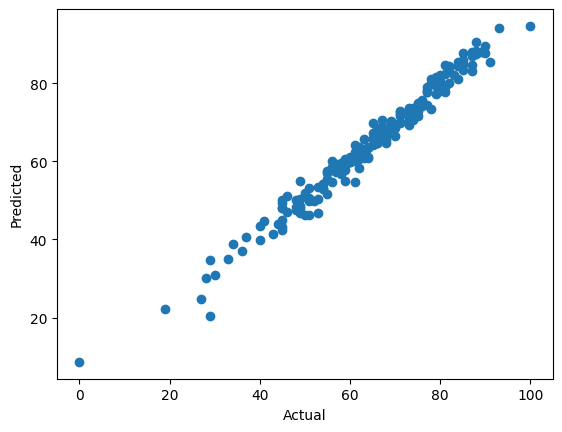

In [59]:
plt.scatter(Y_test ,Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

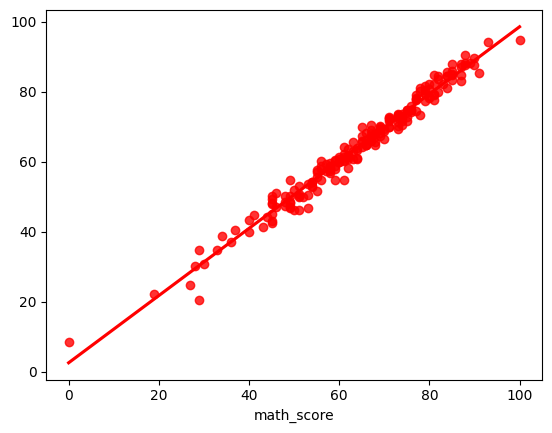

In [60]:
sns.regplot(x=Y_test ,y=Y_pred , ci=None ,color="red")

In [61]:
pred_df = pd.DataFrame({'Actual Value': Y_test ,"Predicted Value":Y_pred , "Difference":Y_test -Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,85.325516,5.674484
737,53,53.536251,-0.536251
740,80,78.089676,1.910324
660,74,71.622139,2.377861
411,84,84.483475,-0.483475
...,...,...,...
408,52,49.909878,2.090122
332,62,63.625099,-1.625099
208,74,70.542130,3.457870
613,65,65.714546,-0.714546
